In [1]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import glob
import os

In [2]:
file_names = glob.glob(os.path.join(os.path.abspath("../"), "logs", "hwv-*"))    

measurements = []

for file in file_names:
    with open(file, "rb") as f:
        data = pickle.load(f)        
        measurements += [d for d in data]

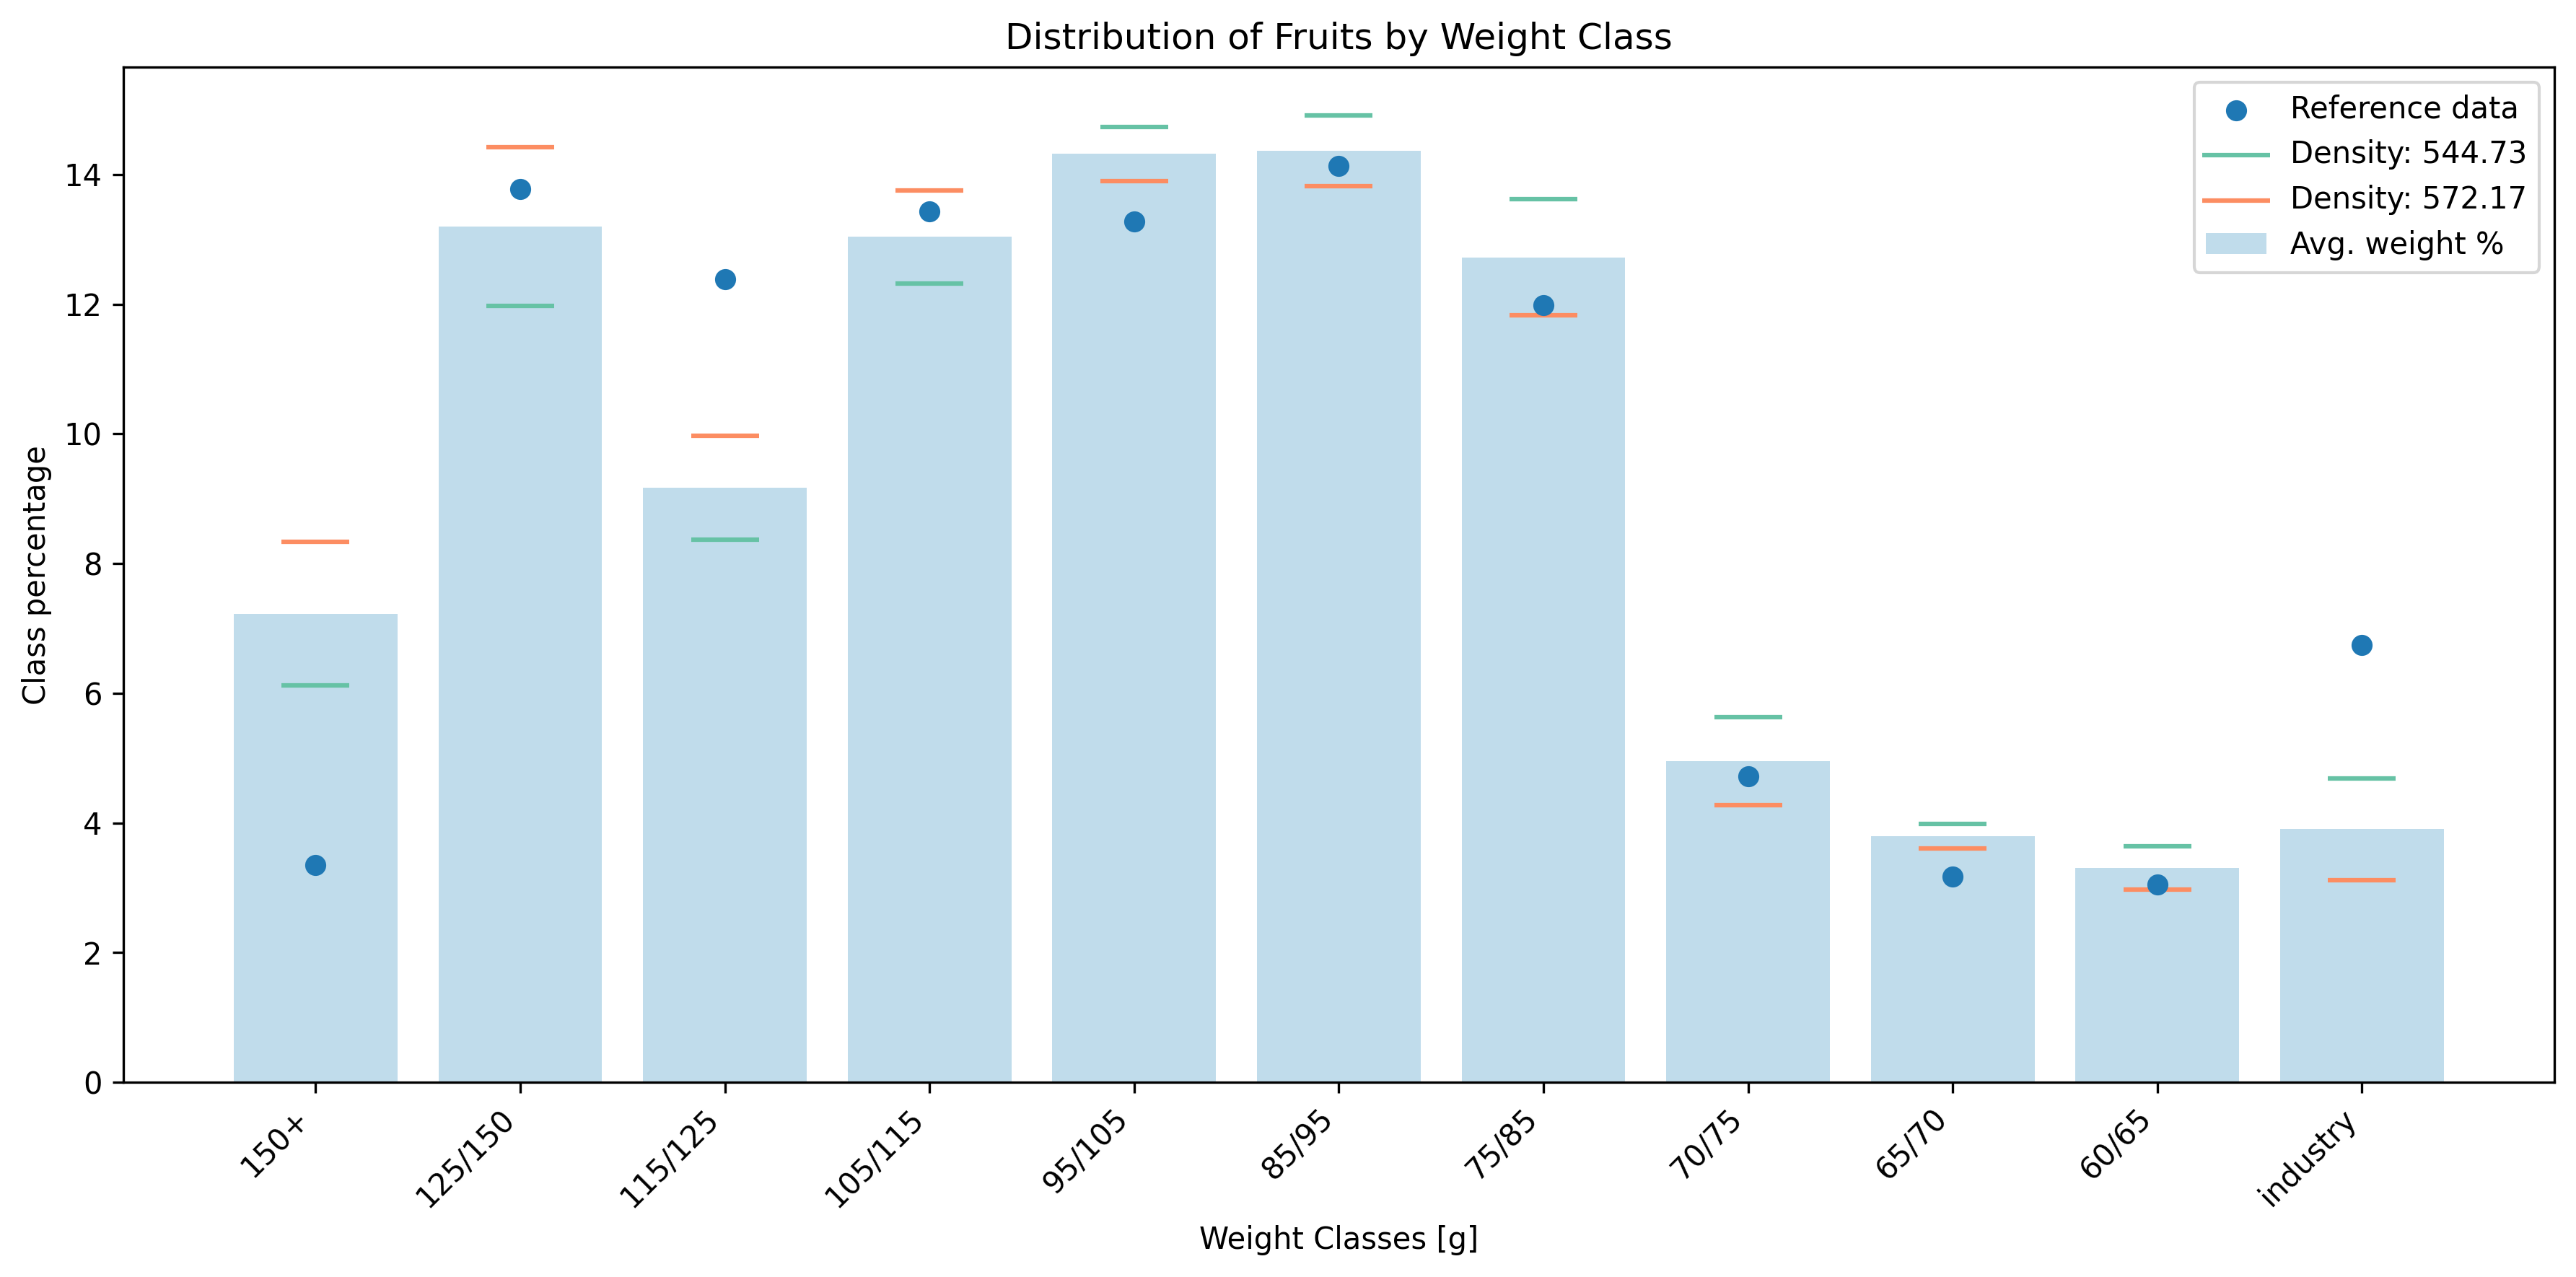

In [48]:
# SPECIFIC_WEIGHT_CM_G = 0.455
# SPECIFIC_WEIGHT_CM_G = [544.73-572.17
BIN_SIZE_CM = 114


def converter(dimensions_px: dict, specific_weight, bias):
    """Basic function that converts pixels to mm

    Args:
        dimensions_px: dict{'img_shape':[x,y,z],'dimensions':list(tuple)}
            img_shape is required as an `image.shape` with shape [x,x,n], x representing the axes of a squared image, n the dimensions (not used and considered).
        bin_idx: the index of the bin

    Returns:
        list[classes]
    """
    ## Convert dimensions in mm
    classes = [0] * 11

    for dimension in dimensions_px:
        height, width, volume_cm = dimension

        weight_est = volume_cm * specific_weight * bias

        weight_est = int(
            np.floor(weight_est) if weight_est < 0.5 else np.ceil(weight_est)
        )

        thresholds = [150, 125, 115, 105, 95, 85, 75, 70, 65, 60]

        for i, threshold in enumerate(thresholds):
            if weight_est > threshold:
                classes[i] += 1
                break
        else:
            classes[-1] += 1

    return np.array(classes)


# https://matplotlib.org/stable/users/explain/colors/colormaps.html#colorblindness
real_data_percentage = [
    3.35,
    13.78,
    10.39 + 1.99,
    11.99 + 1.44,
    13.27,
    12.96 + 1.17,
    11.64 + 0.34,
    4.72,
    3.17,
    3.05,
    6.74,
]
bias = 0.8
classes = converter(measurements, 0.54473, bias)
classes1 = converter(measurements, 0.57217, bias)
labels = [
    "150+",
    "125/150",
    "115/125",
    "105/115",
    "95/105",
    "85/95",
    "75/85",
    "70/75",
    "65/70",
    "60/65",
    "industry",
]
# Plotting

# Calculate average percentages for classes and classes1
avg_percentages_classes = (classes / classes.sum()) * 100
avg_percentages_classes1 = (classes1 / classes1.sum()) * 100


# Calculate average between classes and classes1
average_values = np.mean(np.array([classes, classes1]), axis=0)

# Plotting
percentages = (average_values / average_values.sum()) * 100

colors = plt.cm.Paired(range(2))
colors1 = plt.cm.Set2(range(2))

plt.figure(figsize=(12, 6), dpi=300)

plt.bar(labels, percentages, color=colors[0], label="Avg. weight %", alpha=0.7)

plt.scatter(labels, real_data_percentage, color=colors[1], label="Reference data", zorder=5)

plt.scatter(labels, avg_percentages_classes, color=colors1[0], marker="_", s=500, label="Density: 544.73")
plt.scatter(
    labels, avg_percentages_classes1, color=colors1[1], marker="_", s=500, label="Density: 572.17"
)

plt.legend()
plt.xlabel("Weight Classes [g]")
plt.ylabel("Class percentage")
plt.title("Distribution of Fruits by Weight Class")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.savefig("../final_plot2.png", dpi=300)
plt.show()